<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/reports/%EA%B3%BC%EC%A0%9C_4_2_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##2. (60점) 첨부된 COIL20 데이터(Columbia Object Image Library, HW4_COIL20.mat)에 대한 특징 추출 및 2차원 출력을 수행하기 위한 시스템을 구성하시오.

In [2]:
# !wget https://github.com/SanghunOh/study_machinglearning/blob/main/datas/HW4_COIL20.mat
!ls

HW4_COIL20.mat	sample_data


In [3]:
!pip install mat73

In [4]:
# read features and labels from dataset file(mat)
import mat73
mat_contents = mat73.loadmat('./HW4_COIL20.mat')
type(mat_contents), mat_contents.keys(),
features = mat_contents['X']
labels = mat_contents['Y']

import numpy as np
features.shape, labels.shape, np.unique(labels)

((280, 1024),
 (280,),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20.]))

##PCA(Principal Component Analysis)

###Centering Data

In [5]:
# Normalizing X
norm_class_all = features - features.mean(axis=0)
class_all_std = norm_class_all/norm_class_all.std(axis=0)
class_all_std.shape

(280, 1024)

###Computing the Eigenvectors and Eigenvalues

In [6]:
class_all_std_sigma = np.cov(class_all_std.T)
eigen_values_pca, eigen_vectors_pca = np.linalg.eig(class_all_std_sigma)
eigen_values_pca.shape, eigen_vectors_pca.shape

((1024,), (1024, 1024))

In [7]:
# 벡터별 정보 보유율 확인
eigen_values_pca_sum = sum(eigen_values_pca)
for idx, eigen_value in enumerate(eigen_values_pca):
  projected_rate = eigen_value/eigen_values_pca_sum*100
  print('index {}, rate:{:.2f}'.format(idx, eigen_value/eigen_values_pca_sum*100))
  if idx >= 1: break # 2차원 표시 위해 확당 값만 확인 

index 0, rate:22.18+0.00j
index 1, rate:13.04+0.00j


###2 dimenstion projection

In [9]:
projection_matrix = eigen_vectors_pca.T[0:2]
projection_matrix.shape, projection_matrix,

((2, 1024), array([[-0.01628648+0.j, -0.01628983+0.j, -0.00942615+0.j, ...,
         -0.01618301+0.j, -0.01628648+0.j, -0.01628648+0.j],
        [ 0.02156345+0.j,  0.02254824+0.j,  0.01789977+0.j, ...,
          0.02273808+0.j,  0.02156345+0.j,  0.02156345+0.j]]))

In [10]:
projection_matrix.shape, class_all_std.shape

((2, 1024), (280, 1024))

In [11]:
projected_matrix = class_all_std @ projection_matrix.T
projected_matrix.shape
# class_all_std[:5], projected_matrix[:5]

(280, 2)

In [27]:
lable_unique = np.unique(labels).astype(np.int16)
lable_unique
# label = labels == 1.
# label

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int16)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


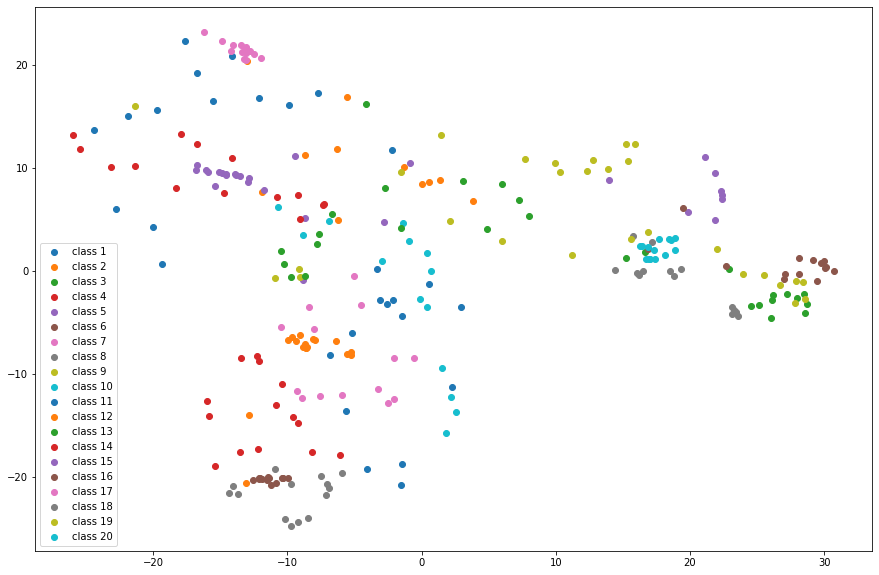

In [28]:
# 분포 확인 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for label in lable_unique:
  label_list = labels == label
  plt.scatter(projected_matrix[label_list,0], projected_matrix[label_list,1], label=f'class {label}')
# plt.scatter(eigen_vectors_pca[:,0], eigen_vectors_pca[:,1])

# 표시 위해 사이즈 증가
scala_size = 20
start_point = np.zeros((2))
# eigen_vector_pca = np.vstack([start_point,eigen_vectors_pca.T[0] * scala_size])
# plt.plot(eigen_vector_pca[:,0], eigen_vector_pca[:,1], label='PCA 1 vector')
plt.legend()
plt.show()

##LDA

In [10]:
# 벡터별 정보 보유율 - 2차원 표시 위해 
eigen_values_pca_sum = sum(eigen_values_pca)
threshold = 95
for idx, eigen_value in enumerate(eigen_values_pca):
  projected_rate = eigen_value/eigen_values_pca_sum*100
  print('index {}, rate:{:.2f}'.format(idx, eigen_value/eigen_values_pca_sum*100))
  if idx >= 1: break

  # if projected_rate >= threshold:
  #   print('index {}, rate:{:.2f}'.format(idx, eigen_value/eigen_values_pca_sum*100))

index 0, rate:22.18+0.00j
index 1, rate:13.04+0.00j
